In [1291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Creating Groups

#### 1.Mortality & 2.Readmission

In [1292]:
data=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\Readmissions and Deaths - Hospital.csv")

In [1293]:
data.shape

(67452, 18)

In [1294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
Provider ID             67452 non-null int64
Hospital Name           67452 non-null object
Address                 67452 non-null object
City                    67452 non-null object
State                   67452 non-null object
ZIP Code                67452 non-null int64
County Name             67242 non-null object
Phone Number            67452 non-null int64
Measure Name            67452 non-null object
Measure ID              67452 non-null object
Compared to National    67452 non-null object
Denominator             67452 non-null object
Score                   67452 non-null object
Lower Estimate          67452 non-null object
Higher Estimate         67452 non-null object
Footnote                25742 non-null object
Measure Start Date      67452 non-null object
Measure End Date        67452 non-null object
dtypes: int64(3), object(15)
memory usage: 9.3+ MB


In [1295]:
#Keepng only 3 columns which willl help in modelling
data_n=data[['Provider ID','Measure ID','Score']]

In [1296]:
# Delete the rows which does not have any scores
data_n.drop(data_n[data_n['Score'] == 'Not Available' ].index , inplace=True)

In [1297]:
data_n.shape

(41710, 3)

In [1298]:
data_m=data_n.loc[data_n['Measure ID'].str.startswith('MORT')]
data_m.head()

,Provider ID,Measure ID,Score
0,10001,MORT_30_AMI,12.5
1,10001,MORT_30_CABG,4.2
2,10001,MORT_30_COPD,9.3
3,10001,MORT_30_HF,12.4
4,10001,MORT_30_PN,15.5


In [1299]:
data_r=data_n.loc[data_n['Measure ID'].str.startswith('READM')]
data_r.head()

,Provider ID,Measure ID,Score
6,10001,READM_30_AMI,16.5
7,10001,READM_30_CABG,15.1
8,10001,READM_30_COPD,21.1
9,10001,READM_30_HF,21.4
10,10001,READM_30_HIP_KNEE,5.1


In [1300]:
data_mortality=data_m.pivot('Provider ID','Measure ID','Score')
data_mortality.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK
Provider ID,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4
10005,16.0,NaN,7.6,15.5,20.8,15.5
10006,16.7,4.1,7.1,15.6,18.2,17.9
10007,NaN,NaN,9.3,14.4,18.8,16.6
10008,NaN,NaN,8.2,12.7,15.7,NaN


In [1301]:
data_readm=data_r.pivot('Provider ID','Measure ID','Score')
data_readm.head()

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,
10001,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
10008,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


#### 3.Safety of Care

In [1302]:
data1=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\Healthcare Associated Infections - Hospital.csv")

In [1303]:
data1.shape

(231264, 15)

In [1304]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
Provider ID             231264 non-null int64
Hospital Name           231264 non-null object
Address                 231264 non-null object
City                    231264 non-null object
State                   231264 non-null object
ZIP Code                231264 non-null int64
County Name             230544 non-null object
Phone Number            231264 non-null int64
Measure Name            231264 non-null object
Measure ID              231264 non-null object
Compared to National    38544 non-null object
Score                   231264 non-null object
Footnote                103373 non-null object
Measure Start Date      231264 non-null object
Measure End Date        231264 non-null object
dtypes: int64(3), object(12)
memory usage: 26.5+ MB


In [1305]:
#Keepng only 3 columns which willl help in modelling
data1_n=data1[['Provider ID','Measure ID','Score']]

In [1306]:
# Delete the rows which does not have any scores
data1_n.drop(data1_n[data1_n['Score'] == 'Not Available' ].index , inplace=True)

In [1307]:
data1_n.shape

(129378, 3)

In [1308]:
data1_s=data1_n.loc[data1_n['Measure ID'].isin(['HAI_1_SIR','HAI_2_SIR','HAI_3_SIR','HAI_4_SIR','HAI_5_SIR','HAI_6_SIR'])]
data1_s.head()

,Provider ID,Measure ID,Score
5,10001,HAI_1_SIR,1.74
17,10001,HAI_2_SIR,1.427
29,10001,HAI_3_SIR,1.87
35,10001,HAI_4_SIR,0
41,10001,HAI_5_SIR,0.422


In [1309]:
data_safety=data1_s.pivot('Provider ID','Measure ID','Score')
data_safety.head()

Measure ID,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR
Provider ID,,,,,,
10001,1.74,1.427,1.87,0,0.422,0.787
10005,1.062,0.456,0.386,NaN,1.388,0.405
10006,0.341,0.641,0.31,NaN,1.261,0.513
10007,NaN,0,NaN,NaN,NaN,0
10008,NaN,NaN,NaN,NaN,NaN,0.585


#### 4.Patient Experience

In [1310]:
data2=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\HCAHPS - Hospital.csv",encoding='cp1252')

In [1311]:
data2.shape

(264990, 22)

In [1312]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
Provider ID                              264990 non-null int64
Hospital Name                            264990 non-null object
Address                                  264990 non-null object
City                                     264990 non-null object
State                                    264990 non-null object
ZIP Code                                 264990 non-null int64
County Name                              264165 non-null object
Phone Number                             264990 non-null int64
HCAHPS Measure ID                        264990 non-null object
HCAHPS Question                          264990 non-null object
HCAHPS Answer Description                264990 non-null object
Patient Survey Star Rating               264990 non-null object
Patient Survey Star Rating Footnote      15720 non-null object
HCAHPS Answer Percent                    264990 non-null obje

In [1313]:
#Keepng only 3 columns which willl help in modelling
data2_n=data2[['Provider ID','HCAHPS Measure ID','HCAHPS Linear Mean Value']]

In [1314]:
# Delete the rows which does not have any scores
data2_n.drop(data2_n[data2_n['HCAHPS Linear Mean Value'] == 'Not Available' ].index , inplace=True)

In [1315]:
data2_n.shape

(250580, 3)

In [1316]:
data2_e=data2_n.loc[data2_n['HCAHPS Measure ID'].isin(['H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_3_LINEAR_SCORE','H_COMP_4_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE','H_HSP_RATING_LINEAR_SCORE','H_QUIET_LINEAR_SCORE','H_RECMND_LINEAR_SCORE'])]
data2_e.head()

,Provider ID,HCAHPS Measure ID,HCAHPS Linear Mean Value
4,10001,H_CLEAN_LINEAR_SCORE,84
7,10001,H_COMP_1_LINEAR_SCORE,90
12,10001,H_COMP_2_LINEAR_SCORE,92
17,10001,H_COMP_3_LINEAR_SCORE,80
22,10001,H_COMP_4_LINEAR_SCORE,86


In [1317]:
data_experience=data2_e.pivot('Provider ID','HCAHPS Measure ID','HCAHPS Linear Mean Value')
data_experience.head()

HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
Provider ID,,,,,,,,,,,
10001,84,90,92,80,86,77,87,82,89,88,90
10005,83,91,94,84,88,80,88,81,90,86,89
10006,83,91,94,83,87,78,83,80,85,86,84
10007,89,91,96,87,89,82,86,82,87,92,86
10011,81,90,92,82,86,74,86,81,88,84,87


#### 5. Medical Imaging


In [1318]:
data3=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\Outpatient Imaging Efficiency - Hospital.csv",encoding='cp1252')

In [1319]:
data3.shape

(28908, 14)

In [1320]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
Provider ID           28908 non-null int64
Hospital Name         28908 non-null object
Address               28908 non-null object
City                  28908 non-null object
State                 28908 non-null object
ZIP Code              28908 non-null int64
County Name           28818 non-null object
Phone Number          28908 non-null int64
Measure ID            28908 non-null object
Measure Name          28908 non-null object
Score                 28908 non-null object
Footnote              12595 non-null object
Measure Start Date    28908 non-null object
Measure End Date      28908 non-null object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [1321]:
#Keepng only 3 columns which willl help in modelling
data3_n=data3[['Provider ID','Measure ID','Score']]

In [1322]:
# Delete the rows which does not have any scores
data3_n.drop(data3_n[data3_n['Score'] == 'Not Available' ].index , inplace=True)

In [1323]:
data3_n.shape

(16313, 3)

In [1324]:
data_medical=data3_n.pivot('Provider ID','Measure ID','Score')
data_medical.head()

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8,OP_9
Provider ID,,,,,,
10001,6.4,0.9,7.1,2.4,38.1,6.9
10005,13.3,10.2,5.3,4.0,42.8,5.1
10006,11.8,4.6,0.0,4.6,45.6,9.1
10007,24.3,6.1,NaN,NaN,NaN,20.7
10008,3.6,NaN,NaN,0.6,NaN,8.2


#### 6. Timeliness

In [1325]:
data4=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\Timely and Effective Care - Hospital.csv",encoding='cp1252')

In [1326]:
data4.shape

(207174, 16)

In [1327]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [1328]:
#Keepng only 3 columns which willl help in modelling
data4_n=data4[['Provider ID','Measure ID','Score']]

In [1329]:
# Delete the rows which does not have any scores
data4_n.drop(data4_n[data4_n['Score'] == 'Not Available' ].index , inplace=True)

In [1330]:
data4_n.shape

(78150, 3)

In [1331]:
data4_t=data4_n.loc[data4_n['Measure ID'].isin(['ED_1b','ED_2b','OP_18b','OP_20','OP_21','OP_3b','OP_5'])]
data4_t.head()

,Provider ID,Measure ID,Score
3,10001,ED_1b,269
4,10001,ED_2b,68
10,10001,OP_18b,196
12,10001,OP_20,65
13,10001,OP_21,99


In [1332]:
data_timeliness=data4_t.pivot('Provider ID','Measure ID','Score')
data_timeliness.head()

Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
Provider ID,,,,,,,
10001,269,68,196,65,99,NaN,NaN
10005,243,71,117,27,60,NaN,12
10006,217,78,133,10,58,NaN,NaN
10007,219,68,119,38,90,NaN,7
10008,180,56,98,27,49,NaN,NaN


#### 7. Effectiveness

In [1333]:
data5=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\Timely and Effective Care - Hospital.csv",encoding='cp1252')

In [1334]:
data5.shape

(207174, 16)

In [1335]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [1336]:
#Keepng only 3 columns which willl help in modelling
data5_n=data5[['Provider ID','Measure ID','Score']]

In [1337]:
# Delete the rows which does not have any scores
data5_n.drop(data5_n[data5_n['Score'] == 'Not Available' ].index , inplace=True)

In [1338]:
data5_n.shape

(78150, 3)

In [1339]:
data5_t=data5_n.loc[data5_n['Measure ID'].isin(['CAC_3','IMM_2','IMM_3_OP_27_FAC_ADHPCT','OP_22','OP_23','OP_29','OP_30','OP_4','PC_01','STK_4','STK_5','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6'])]
data5_t.head()




,Provider ID,Measure ID,Score
7,10001,IMM_2,97
8,10001,IMM_3_OP_27_FAC_ADHPCT,81
14,10001,OP_22,4
17,10001,OP_30,82
21,10001,PC_01,0


In [1340]:
data_effectiveness = data5_t.pivot('Provider ID','Measure ID','Score')
data_effectiveness.head()

Measure ID,CAC_3,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_4,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,
10001,NaN,97,81,4,NaN,NaN,82,NaN,0,67,98,99,87,97,99,91,90,0
10005,NaN,99,83,2,86,92,92,99,1,NaN,99,88,100,95,94,100,100,NaN
10006,NaN,100,87,1,NaN,70,88,NaN,0,NaN,99,97,90,98,89,86,92,0
10007,NaN,99,53,1,NaN,0,0,89,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN
10008,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN


##### Merging all the groups into one dataframe

In [1341]:
from functools import reduce
#dfs_all = [data_mortality,data_readm,data_safety,data_experience,data_medical,data_timeliness,data_effectiveness]
df_final1 = pd.merge(data_mortality,data_readm,on='Provider ID')
df_final2 = pd.merge(df_final1,data_safety,on='Provider ID')
df_final3 = pd.merge(df_final2,data_experience,on='Provider ID')
df_final4 = pd.merge(df_final3,data_medical,on='Provider ID')
df_final5 = pd.merge(df_final4,data_timeliness,on='Provider ID')
df_final6 = pd.merge(df_final5,data_effectiveness,on='Provider ID')
df_final6.shape

(2905, 62)

In [1342]:
df_final6.head()

,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,...,PC_01,STK_4,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,...,0,67,98,99,87,97,99,91,90,0
10005,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,...,1,NaN,99,88,100,95,94,100,100,NaN
10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,...,0,NaN,99,97,90,98,89,86,92,0
10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,...,NaN,NaN,100,71,NaN,97,99,NaN,NaN,NaN
10011,13.9,3.7,7.4,13.8,17.9,12.6,17.7,15.0,19.6,19.8,...,0,0,NaN,90,43,60,69,65,100,21


This final dataframe contains all the Hospital ID and all 62 measures in which the hospitals are rated.

### Merging the final data frame to Hospital General Hospital File

In [1343]:
data6=pd.read_csv(r"C:\Users\User\Downloads\Hospital_Revised_FlatFiles_20161110\Hospital General Information.csv",encoding='cp1252')

In [1344]:
data6.shape

(4818, 28)

In [1345]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
Provider ID                                                      4818 non-null int64
Hospital Name                                                    4818 non-null object
Address                                                          4818 non-null object
City                                                             4818 non-null object
State                                                            4818 non-null object
ZIP Code                                                         4818 non-null int64
County Name                                                      4803 non-null object
Phone Number                                                     4818 non-null int64
Hospital Type                                                    4818 non-null object
Hospital Ownership                                               4818 non-null object
Emergency Services                  

In [1346]:
data6_col=data6[['Provider ID','Hospital Name','Address','City','State','ZIP Code','County Name','Hospital Type','Hospital Ownership','Emergency Services','Meets criteria for meaningful use of EHRs','Hospital overall rating']]

In [1347]:
# Delete the rows which does not have any rating
data6_col.drop(data6_col[data6_col['Hospital overall rating'] == 'Not Available' ].index , inplace=True)

In [1348]:
data6_col.shape

(3648, 12)

In [1349]:
data6_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 12 columns):
Provider ID                                  3648 non-null int64
Hospital Name                                3648 non-null object
Address                                      3648 non-null object
City                                         3648 non-null object
State                                        3648 non-null object
ZIP Code                                     3648 non-null int64
County Name                                  3644 non-null object
Hospital Type                                3648 non-null object
Hospital Ownership                           3648 non-null object
Emergency Services                           3648 non-null object
Meets criteria for meaningful use of EHRs    3452 non-null object
Hospital overall rating                      3648 non-null object
dtypes: int64(2), object(10)
memory usage: 370.5+ KB


In [1350]:
df_main = pd.merge(df_final6,data6_col,on='Provider ID')
df_main.shape

(2903, 74)

In [1351]:
df_main.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,...,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,...,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,...,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,...,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3
4,10011,13.9,3.7,7.4,13.8,17.9,12.6,17.7,15.0,19.6,...,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2


### Data Cleaning

In [1352]:
df_main.isnull().sum()

Provider ID                                     0
MORT_30_AMI                                   594
MORT_30_CABG                                 1878
MORT_30_COPD                                   50
MORT_30_HF                                     30
MORT_30_PN                                      5
MORT_30_STK                                   375
READM_30_AMI                                  793
READM_30_CABG                                1888
READM_30_COPD                                  36
READM_30_HF                                    25
READM_30_HIP_KNEE                             498
READM_30_HOSP_WIDE                              0
READM_30_PN                                     4
READM_30_STK                                  419
HAI_1_SIR                                     667
HAI_2_SIR                                     249
HAI_3_SIR                                     955
HAI_4_SIR                                    2089
HAI_5_SIR                                    1169


In [1353]:
#Adding the country name missing for 2 records
df_main['County Name']=df_main['County Name'].fillna(df_main['County Name'].mode()[0])

In [1354]:
df_main.isnull().sum()

Provider ID                                     0
MORT_30_AMI                                   594
MORT_30_CABG                                 1878
MORT_30_COPD                                   50
MORT_30_HF                                     30
MORT_30_PN                                      5
MORT_30_STK                                   375
READM_30_AMI                                  793
READM_30_CABG                                1888
READM_30_COPD                                  36
READM_30_HF                                    25
READM_30_HIP_KNEE                             498
READM_30_HOSP_WIDE                              0
READM_30_PN                                     4
READM_30_STK                                  419
HAI_1_SIR                                     667
HAI_2_SIR                                     249
HAI_3_SIR                                     955
HAI_4_SIR                                    2089
HAI_5_SIR                                    1169


In [1355]:
df_main['Meets criteria for meaningful use of EHRs']=df_main['Meets criteria for meaningful use of EHRs'].fillna(df_main['Meets criteria for meaningful use of EHRs'].mode()[0])
df_main.isnull().sum()

Provider ID                                     0
MORT_30_AMI                                   594
MORT_30_CABG                                 1878
MORT_30_COPD                                   50
MORT_30_HF                                     30
MORT_30_PN                                      5
MORT_30_STK                                   375
READM_30_AMI                                  793
READM_30_CABG                                1888
READM_30_COPD                                  36
READM_30_HF                                    25
READM_30_HIP_KNEE                             498
READM_30_HOSP_WIDE                              0
READM_30_PN                                     4
READM_30_STK                                  419
HAI_1_SIR                                     667
HAI_2_SIR                                     249
HAI_3_SIR                                     955
HAI_4_SIR                                    2089
HAI_5_SIR                                    1169


In [1356]:
#Imputing the mean for other NaN values for the numerical columns
df_main = df_main.fillna(df_main.median())
df_main.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,...,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3
1,10005,16.0,3.2,7.6,15.5,20.8,15.5,16.7,14.3,18.0,...,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,...,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2
3,10007,14,3.2,9.3,14.4,18.8,16.6,16.85,14.3,19.9,...,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3
4,10011,13.9,3.7,7.4,13.8,17.9,12.6,17.7,15.0,19.6,...,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2


In [1357]:
df_main.isnull().sum()

Provider ID                                  0
MORT_30_AMI                                  0
MORT_30_CABG                                 0
MORT_30_COPD                                 0
MORT_30_HF                                   0
MORT_30_PN                                   0
MORT_30_STK                                  0
READM_30_AMI                                 0
READM_30_CABG                                0
READM_30_COPD                                0
READM_30_HF                                  0
READM_30_HIP_KNEE                            0
READM_30_HOSP_WIDE                           0
READM_30_PN                                  0
READM_30_STK                                 0
HAI_1_SIR                                    0
HAI_2_SIR                                    0
HAI_3_SIR                                    0
HAI_4_SIR                                    0
HAI_5_SIR                                    0
HAI_6_SIR                                    0
H_CLEAN_LINEA

In [1358]:
df_main.shape

(2903, 74)

In [1359]:
df_main[['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'HAI_1_SIR',
       'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'OP_9', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_3b', 'OP_5',
       'CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29',
       'OP_30', 'OP_4', 'PC_01', 'STK_4', 'STK_5', 'STK_6', 'STK_8', 'VTE_1',
       'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']] = df_main[['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'HAI_1_SIR',
       'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'OP_9', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_3b', 'OP_5',
       'CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29',
       'OP_30', 'OP_4', 'PC_01', 'STK_4', 'STK_5', 'STK_6', 'STK_8', 'VTE_1',
       'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']].apply(pd.to_numeric)

In [1360]:
#ASSIGNING WEIGHTS

df_main['mortalityAverage'] = df_main.loc[:,'MORT_30_AMI':'MORT_30_STK'].mean(axis=1)
df_main['readmissionAverage'] = df_main.loc[:,'READM_30_AMI':'READM_30_STK'].mean(axis=1)
df_main['safetyAverage'] = df_main.loc[:,'HAI_1_SIR':'HAI_6_SIR'].mean(axis=1)
df_main['patientexpAverage'] = df_main.loc[:,'H_CLEAN_LINEAR_SCORE':'H_RECMND_LINEAR_SCORE'].mean(axis=1)
df_main['medicalImagingAverage'] = df_main.loc[:,'OP_10':'OP_9'].mean(axis=1)
df_main['timelinessAverage'] = df_main.loc[:,'ED_1b':'OP_5'].mean(axis=1)
df_main['effectivenessAverage'] = df_main.loc[:,'CAC_3':'VTE_6'].mean(axis=1)
def mortalityWeight(df_main):
    
    if(df_main['mortalityAverage'] >= 15 and df_main['mortalityAverage']<20):
        return 1
    elif(df_main['mortalityAverage'] >= 10 and df_main['mortalityAverage']<15):
        return 2
    elif(df_main['mortalityAverage'] >= 5 and df_main['mortalityAverage']<10):
        return 3
    elif(df_main['mortalityAverage'] >= 2 and df_main['mortalityAverage']<5):
        return 4
    elif(df_main['mortalityAverage'] >= 0 and df_main['mortalityAverage']<2):
        return 5
    else:
        return 0

df_main['mortality_Rating'] = df_main.apply(mortalityWeight,axis=1)

def readmissionWeight(df_main):
    
    if(df_main['readmissionAverage'] >= 15 and df_main['readmissionAverage']<20):
        return 1
    elif(df_main['readmissionAverage'] >= 10 and df_main['readmissionAverage']<15):
        return 2
    elif(df_main['readmissionAverage'] >= 5 and df_main['readmissionAverage']<10):
        return 3
    elif(df_main['readmissionAverage'] >= 2 and df_main['readmissionAverage']<5):
        return 4
    elif(df_main['readmissionAverage'] >= 0 and df_main['readmissionAverage']<2):
        return 5
    else:
        return 0

df_main['readmission_Rating'] = df_main.apply(readmissionWeight,axis=1)

def safetyWeight(df_main):
    
    if(df_main['safetyAverage'] >= 15 and df_main['safetyAverage']<20):
        return 1
    elif(df_main['safetyAverage'] >= 10 and df_main['safetyAverage']<15):
        return 2
    elif(df_main['safetyAverage'] >= 5 and df_main['safetyAverage']<10):
        return 3
    elif(df_main['safetyAverage'] >= 2 and df_main['safetyAverage']<5):
        return 4
    elif(df_main['safetyAverage'] >= 0 and df_main['safetyAverage']<2):
        return 5
    else:
        return 0

df_main['safety_Rating'] = df_main.apply(safetyWeight,axis=1)

def patientexpWeight(df_main):
    
    if(df_main['patientexpAverage'] >= 15 and df_main['patientexpAverage']<20):
        return 1
    elif(df_main['patientexpAverage'] >= 10 and df_main['patientexpAverage']<15):
        return 2
    elif(df_main['patientexpAverage'] >= 5 and df_main['patientexpAverage']<10):
        return 3
    elif(df_main['patientexpAverage'] >= 2 and df_main['patientexpAverage']<5):
        return 4
    elif(df_main['patientexpAverage'] >= 0 and df_main['patientexpAverage']<2):
        return 5
    else:
        return 0

df_main['patientexp_Rating'] = df_main.apply(patientexpWeight,axis=1)

def medicalImagingWeight(df_main):
    
    if(df_main['medicalImagingAverage'] >= 15 and df_main['medicalImagingAverage']<20):
        return 1
    elif(df_main['medicalImagingAverage'] >= 10 and df_main['medicalImagingAverage']<15):
        return 2
    elif(df_main['medicalImagingAverage'] >= 5 and df_main['medicalImagingAverage']<10):
        return 3
    elif(df_main['medicalImagingAverage'] >= 2 and df_main['medicalImagingAverage']<5):
        return 4
    elif(df_main['medicalImagingAverage'] >= 0 and df_main['medicalImagingAverage']<2):
        return 5
    else:
        return 0

df_main['medicalImaging_Rating'] = df_main.apply(medicalImagingWeight,axis=1)

def timelinessWeight(df_main):
    
    if(df_main['timelinessAverage'] >= 15 and df_main['timelinessAverage']<20):
        return 5
    elif(df_main['timelinessAverage'] >= 10 and df_main['timelinessAverage']<15):
        return 4
    elif(df_main['timelinessAverage'] >= 5 and df_main['timelinessAverage']<10):
        return 3
    elif(df_main['timelinessAverage'] >= 2 and df_main['timelinessAverage']<5):
        return 2
    elif(df_main['timelinessAverage'] >= 0 and df_main['timelinessAverage']<2):
        return 1
    else:
        return 0

df_main['timeliness_Rating'] = df_main.apply(timelinessWeight,axis=1)

def effectivenessWeight(df_main):
    
    if(df_main['effectivenessAverage'] > 15):
        return 5
    elif(df_main['effectivenessAverage'] >= 10 and df_main['effectivenessAverage']<15):
        return 4
    elif(df_main['effectivenessAverage'] >= 5 and df_main['effectivenessAverage']<10):
        return 3
    elif(df_main['effectivenessAverage'] >= 2 and df_main['effectivenessAverage']<5):
        return 2
    elif(df_main['effectivenessAverage'] >= 0 and df_main['effectivenessAverage']<2):
        return 1
    else:
        return 0

df_main['effectiveness_Rating'] = df_main.apply(effectivenessWeight,axis=1)


df_main.head()


,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,medicalImagingAverage,timelinessAverage,effectivenessAverage,mortality_Rating,readmission_Rating,safety_Rating,patientexp_Rating,medicalImaging_Rating,timeliness_Rating,effectiveness_Rating
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.50,15.1,21.1,...,10.300000,107.928571,74.611111,2,1,5,0,2,0,5
1,10005,16.0,3.2,7.6,15.5,20.8,15.5,16.70,14.3,18.0,...,13.450000,83.071429,78.833333,2,1,5,0,2,0,5
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.10,15.2,19.8,...,12.616667,79.214286,75.500000,2,1,5,0,2,0,5
3,10007,14.0,3.2,9.3,14.4,18.8,16.6,16.85,14.3,19.9,...,16.300000,84.642857,64.666667,2,1,5,0,1,0,5
4,10011,13.9,3.7,7.4,13.8,17.9,12.6,17.70,15.0,19.6,...,10.866667,99.928571,55.388889,2,1,5,0,2,0,5


In [1361]:
#Final Weighted group scores
df_main['Final_Weighted_Score'] = df_main.loc[:,'mortality_Rating':'effectiveness_Rating'].mean(axis=1)

def starRatings(df_main):
    
    if(df_main['Final_Weighted_Score']>= 0 and df_main['Final_Weighted_Score']< 1):
        return 1
    elif(df_main['Final_Weighted_Score']>= 1 and df_main['Final_Weighted_Score']< 2):
        return 2
    elif(df_main['Final_Weighted_Score']>=2 and df_main['Final_Weighted_Score']< 3):
        return 3
    elif(df_main['Final_Weighted_Score']>=3 and df_main['Final_Weighted_Score']< 4):
        return 4
    elif(df_main['Final_Weighted_Score']>=4 and df_main['Final_Weighted_Score']< 5):
        return 5
    else:
        return 0

df_main['StarRatings'] = df_main.apply(starRatings,axis=1)
df_main.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,effectivenessAverage,mortality_Rating,readmission_Rating,safety_Rating,patientexp_Rating,medicalImaging_Rating,timeliness_Rating,effectiveness_Rating,Final_Weighted_Score,StarRatings
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.50,15.1,21.1,...,74.611111,2,1,5,0,2,0,5,2.142857,3
1,10005,16.0,3.2,7.6,15.5,20.8,15.5,16.70,14.3,18.0,...,78.833333,2,1,5,0,2,0,5,2.142857,3
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.10,15.2,19.8,...,75.500000,2,1,5,0,2,0,5,2.142857,3
3,10007,14.0,3.2,9.3,14.4,18.8,16.6,16.85,14.3,19.9,...,64.666667,2,1,5,0,1,0,5,2.000000,3
4,10011,13.9,3.7,7.4,13.8,17.9,12.6,17.70,15.0,19.6,...,55.388889,2,1,5,0,2,0,5,2.142857,3


In [1362]:
df_main['StarRatings'].value_counts()

3    2884
2      19
Name: StarRatings, dtype: int64

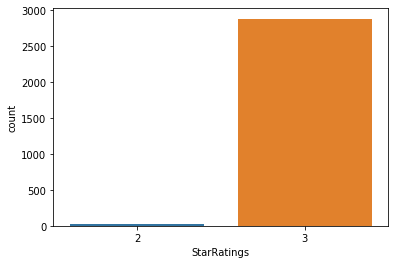

In [1363]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df_main['StarRatings'])
plt.show()

In [1364]:
df_main_nonstandard = df_main
df_main_nonstandard.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,effectivenessAverage,mortality_Rating,readmission_Rating,safety_Rating,patientexp_Rating,medicalImaging_Rating,timeliness_Rating,effectiveness_Rating,Final_Weighted_Score,StarRatings
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.50,15.1,21.1,...,74.611111,2,1,5,0,2,0,5,2.142857,3
1,10005,16.0,3.2,7.6,15.5,20.8,15.5,16.70,14.3,18.0,...,78.833333,2,1,5,0,2,0,5,2.142857,3
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.10,15.2,19.8,...,75.500000,2,1,5,0,2,0,5,2.142857,3
3,10007,14.0,3.2,9.3,14.4,18.8,16.6,16.85,14.3,19.9,...,64.666667,2,1,5,0,1,0,5,2.000000,3
4,10011,13.9,3.7,7.4,13.8,17.9,12.6,17.70,15.0,19.6,...,55.388889,2,1,5,0,2,0,5,2.142857,3


In [1365]:
cat= df_main.select_dtypes(include=['object'])
num=df_main.select_dtypes(exclude=['object'])

In [1366]:
cat.columns

Index(['Hospital Name', 'Address', 'City', 'State', 'County Name',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services',
       'Meets criteria for meaningful use of EHRs', 'Hospital overall rating'],
      dtype='object')

In [1367]:
num.columns

Index(['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'HAI_1_SIR',
       'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'OP_9', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_3b', 'OP_5',
       'CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29',
       'OP_30', 'OP_4', 'PC_01', 'STK_4', 'STK_5', 'STK_6', 'STK_8', 'VTE_1',
       'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'ZI

In [1368]:
num_columns=['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'HAI_1_SIR',
       'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'OP_9', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_3b', 'OP_5',
       'CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29',
       'OP_30', 'OP_4', 'PC_01', 'STK_4', 'STK_5', 'STK_6', 'STK_8', 'VTE_1',
       'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']

##### Standardising the variables to convert to a common scale

In [1369]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_main[num_columns] = scaler.fit_transform(df_main[num_columns])

In [1370]:
df_main.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,effectivenessAverage,mortality_Rating,readmission_Rating,safety_Rating,patientexp_Rating,medicalImaging_Rating,timeliness_Rating,effectiveness_Rating,Final_Weighted_Score,StarRatings
0,-1.590894,-1.377309,1.821096,1.025638,0.224082,-0.395936,0.322920,-0.465186,1.136891,0.798864,...,74.611111,2,1,5,0,2,0,5,2.142857,3
1,-1.590869,1.747780,-0.090752,-0.424145,2.294286,2.010477,0.386826,-0.221150,-0.057768,-1.499920,...,78.833333,2,1,5,0,2,0,5,2.142857,3
2,-1.590862,2.372798,1.629912,-0.850551,2.361067,0.829972,1.920571,-0.953258,1.286223,-0.165142,...,75.500000,2,1,5,0,2,0,5,2.142857,3
3,-1.590856,-0.037985,-0.090752,1.025638,1.559698,1.102396,1.089793,-0.038123,-0.057768,-0.090988,...,64.666667,2,1,5,0,1,0,5,2.000000,3
4,-1.590831,-0.127273,0.865172,-0.594707,1.159013,0.693760,-1.466449,0.999030,0.987558,-0.313451,...,55.388889,2,1,5,0,2,0,5,2.142857,3


### EDA

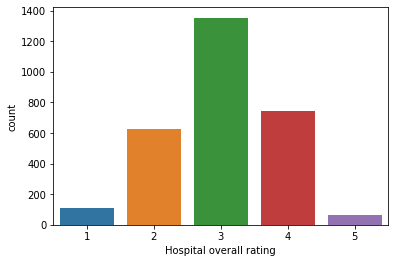

In [1371]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df_main['Hospital overall rating'])
plt.show()

#### Inference:

From the above we can observe that majority of the hospitals fall under the rating of 3. Only the minimum of the hospitals have a rating of 5.

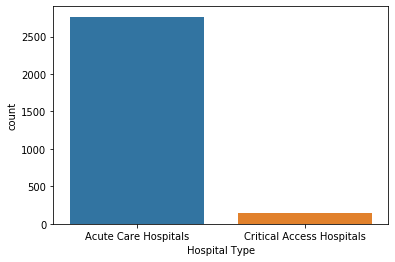

In [1372]:
sns.countplot(df_main['Hospital Type'])
plt.show()

#### Inference:


Almost majority of the hospitals provide the acute care. There are very less hospitals which provide the critical access care.

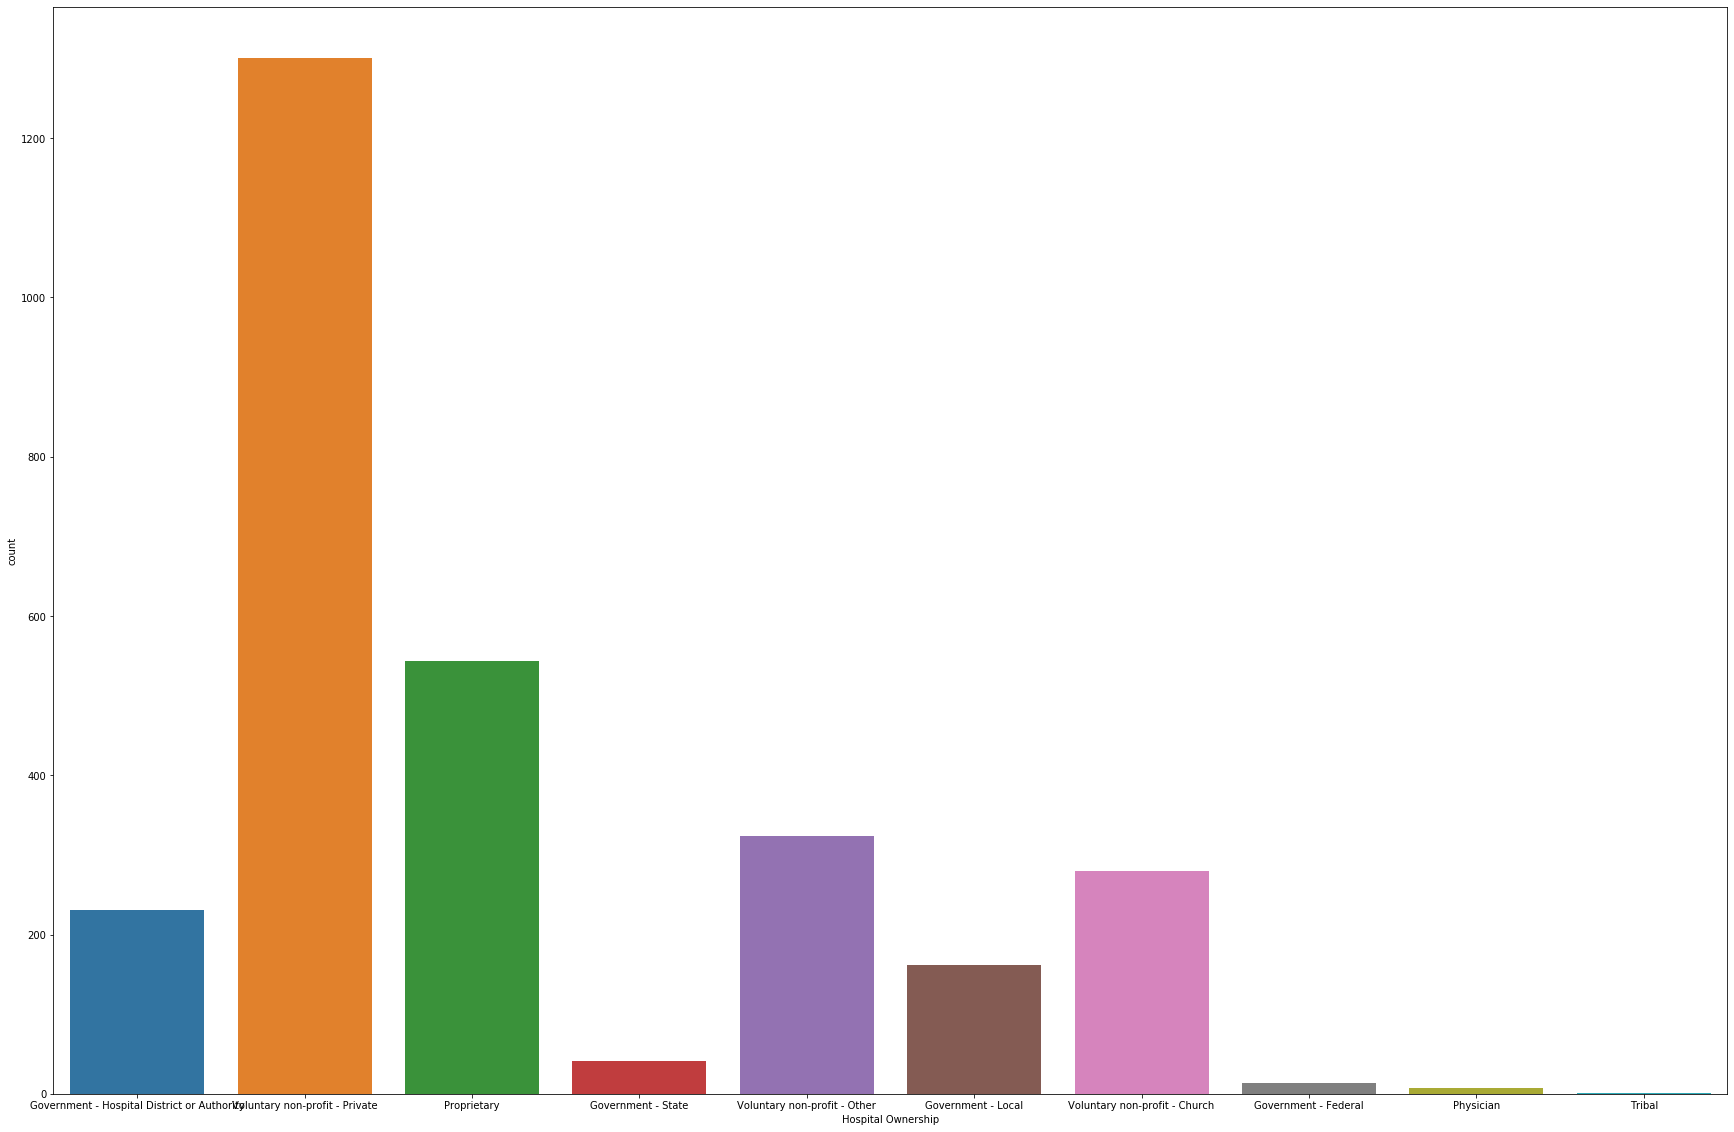

In [1373]:
plt.figure(figsize=(30,20))
sns.countplot(df_main['Hospital Ownership'])
plt.show()

#### Inference

We could observe that voluntary non-profit and private ownership are popular among the hospital ownership.


## Modelling

#### Test Train Split

In [1374]:
#importing the required library
from sklearn.model_selection import train_test_split

In [1375]:
# Putting feature variable to X
X = df_main.drop(['Hospital Name', 'Address', 'City', 'State', 'County Name',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services',
       'Meets criteria for meaningful use of EHRs','Provider ID','Hospital overall rating','ZIP Code'], axis=1)
X.head()

,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,...,effectivenessAverage,mortality_Rating,readmission_Rating,safety_Rating,patientexp_Rating,medicalImaging_Rating,timeliness_Rating,effectiveness_Rating,Final_Weighted_Score,StarRatings
0,-1.377309,1.821096,1.025638,0.224082,-0.395936,0.322920,-0.465186,1.136891,0.798864,-0.360757,...,74.611111,2,1,5,0,2,0,5,2.142857,3
1,1.747780,-0.090752,-0.424145,2.294286,2.010477,0.386826,-0.221150,-0.057768,-1.499920,-0.048547,...,78.833333,2,1,5,0,2,0,5,2.142857,3
2,2.372798,1.629912,-0.850551,2.361067,0.829972,1.920571,-0.953258,1.286223,-0.165142,-0.860292,...,75.500000,2,1,5,0,2,0,5,2.142857,3
3,-0.037985,-0.090752,1.025638,1.559698,1.102396,1.089793,-0.038123,-0.057768,-0.090988,-0.548083,...,64.666667,2,1,5,0,1,0,5,2.000000,3
4,-0.127273,0.865172,-0.594707,1.159013,0.693760,-1.466449,0.999030,0.987558,-0.313451,-1.359828,...,55.388889,2,1,5,0,2,0,5,2.142857,3


In [1376]:
X.shape

(2903, 78)

In [1377]:
# Putting response variable to y
y = df_main['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    2
Name: Hospital overall rating, dtype: object

In [1378]:
y.shape

(2903,)

In [1379]:

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.30, random_state=100)

In [1380]:
X_train.head()

,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,...,effectivenessAverage,mortality_Rating,readmission_Rating,safety_Rating,patientexp_Rating,medicalImaging_Rating,timeliness_Rating,effectiveness_Rating,Final_Weighted_Score,StarRatings
1974,-0.752291,1.247542,-0.083019,0.825109,-1.803461,0.067296,0.877012,0.987558,-0.461759,1.512502,...,73.722222,2,1,5,0,2,0,5,2.142857,3
55,-0.037985,-0.090752,-0.253582,0.624767,1.284013,-0.060516,-0.038123,-0.057768,0.873018,1.075408,...,75.500000,2,1,5,0,2,0,5,2.142857,3
2668,-0.037985,-0.090752,-0.168301,0.624767,0.739164,0.322920,-0.038123,-0.057768,-1.648228,-0.360757,...,77.444444,2,2,5,0,3,0,5,2.428571,3
1616,-0.127273,-0.090752,-0.083019,-0.243383,0.148912,-1.466449,-2.417474,-0.057768,-0.906685,-0.922734,...,72.444444,2,2,5,0,2,0,5,2.285714,3
613,-0.395138,-0.090752,-0.594707,0.157302,-0.532148,0.961981,-0.038123,-0.057768,0.279784,-0.048547,...,77.000000,2,1,5,0,2,0,5,2.142857,3


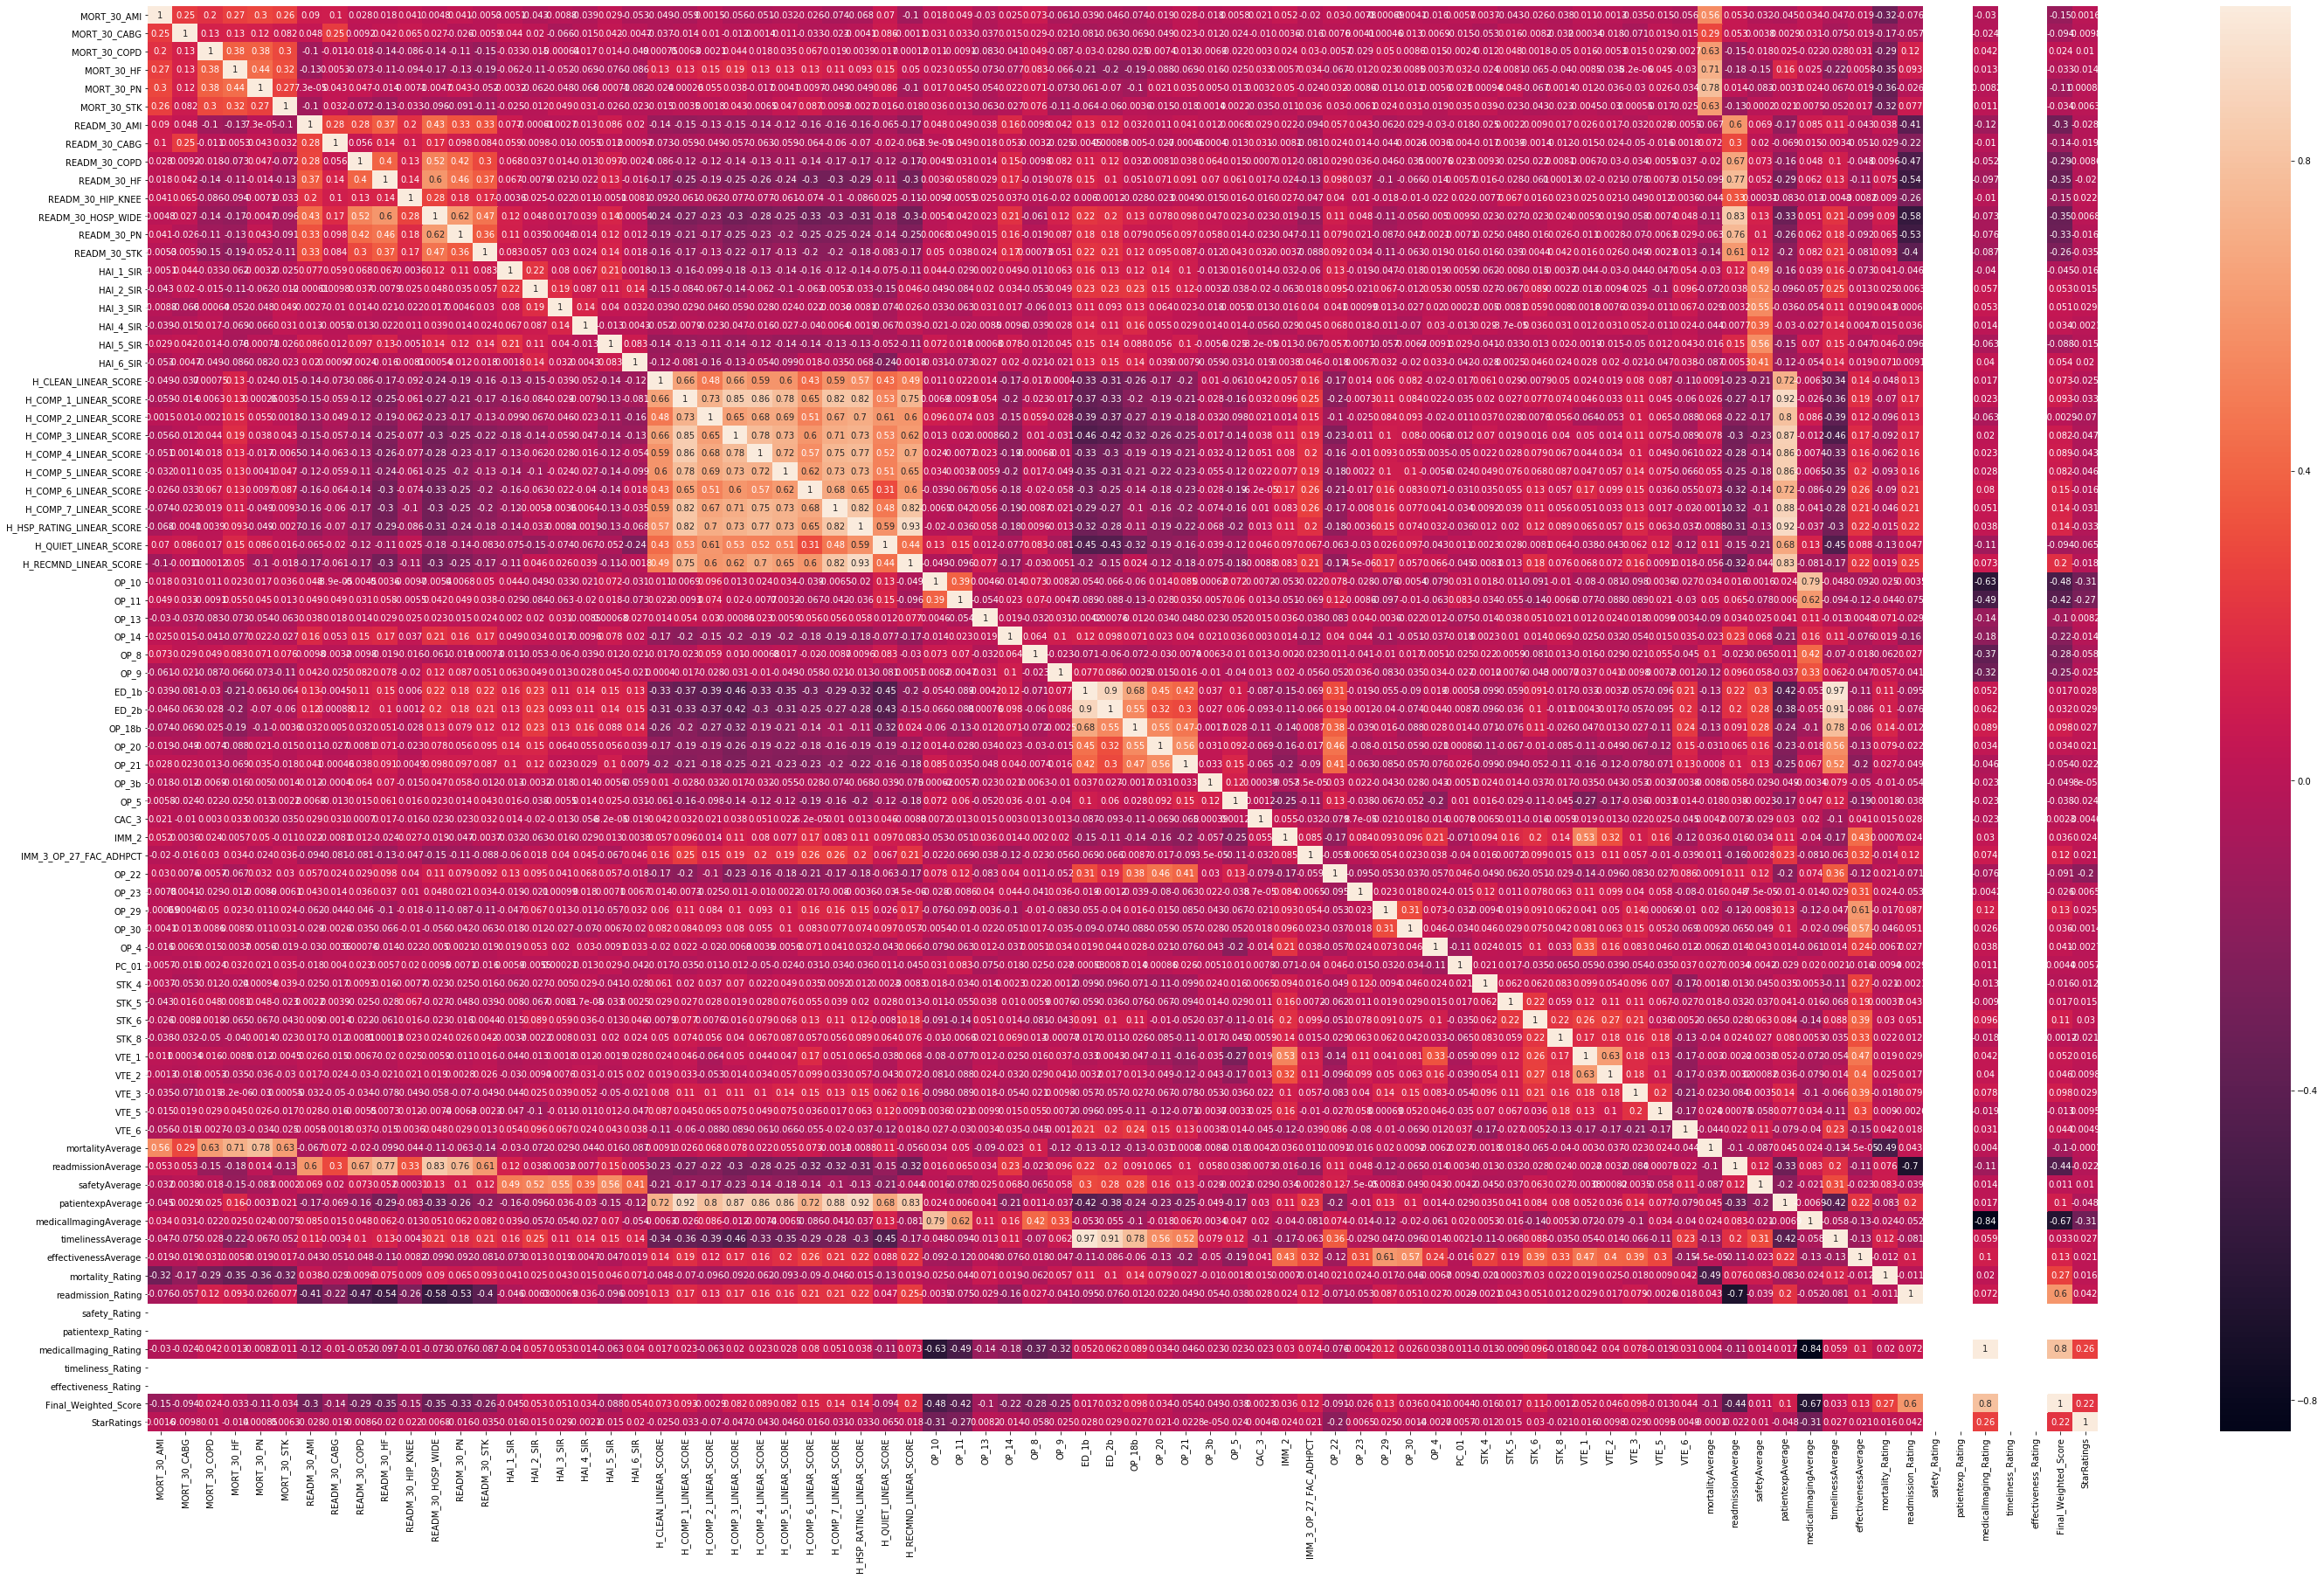

In [1381]:
# See the correlation matrix 
plt.figure(figsize = (50,30))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Random Forest

In [1382]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=5)
rm.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1383]:
rm_prd = rm.predict(X_train)
pd.crosstab(pd.Series(Y_train, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,1,2,3,4,5,All
Actual,,,,,,
1,1,13,38,16,3,71
2,14,76,158,69,6,323
3,24,154,345,142,10,675
4,12,59,145,90,9,315
5,0,4,20,6,1,31
All,51,306,706,323,29,1415


In [1384]:
#Getting Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_train, rm_prd)))


accuracy_rm = accuracy_score(Y_train, rm_prd)


Accuracy is 0.97


In [1385]:
rm_prd1 = rm.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(rm_prd1, name = 'Predict'), margins = True)

Predict,1,2,3,4,5,All
Actual,,,,,,
1,0,3,5,3,0,11
2,1,12,43,19,0,75
3,2,17,58,32,0,109
4,0,13,38,19,1,71
5,0,1,2,3,0,6
All,3,46,146,76,1,272


In [1386]:
#Getting Accuracy,Precision,Recall
from sklearn.metrics import accuracy_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, rm_prd1)))


accuracy_rm = accuracy_score(Y_test, rm_prd1)

Accuracy is 0.63


In [1387]:
# Getting the predicted values on the train set
y_test_pred = pd.DataFrame(rm.predict(X_test))
y_test_pred[:10]

,0
0,3
1,3
2,3
3,3
4,4
5,4
6,3
7,3
8,4
9,2


In [1388]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array(['3', '3', '3', '3', '4', '4', '3', '3', '4', '2'], dtype=object)

In [1389]:
y_test_pred_final = pd.DataFrame({'Rating':Y_test.values, 'Predicted_Rating':rm_prd1})
y_test_pred_final['Provider ID'] = Y_test.index
y_test_pred_final.head()

,Rating,Predicted_Rating,Provider ID
0,2,3,2609
1,3,3,606
2,4,3,98
3,3,3,774
4,4,4,2616


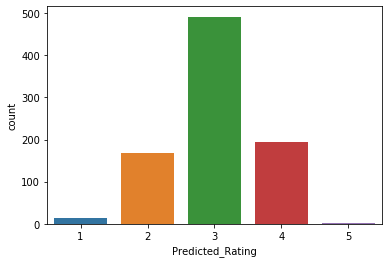

In [1390]:
sns.countplot(y_test_pred_final['Predicted_Rating'])
plt.show()

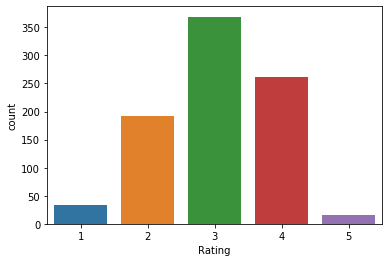

In [1391]:
sns.countplot(y_test_pred_final['Rating'])
plt.show()

##### Important features

In [1392]:
importance = rm.feature_importances_

Feature: 0, Score: 0.01348
Feature: 1, Score: 0.00611
Feature: 2, Score: 0.02059
Feature: 3, Score: 0.02240
Feature: 4, Score: 0.01895
Feature: 5, Score: 0.01646
Feature: 6, Score: 0.01546
Feature: 7, Score: 0.00975
Feature: 8, Score: 0.01876
Feature: 9, Score: 0.01703
Feature: 10, Score: 0.00902
Feature: 11, Score: 0.06710
Feature: 12, Score: 0.02387
Feature: 13, Score: 0.01688
Feature: 14, Score: 0.00944
Feature: 15, Score: 0.00881
Feature: 16, Score: 0.00863
Feature: 17, Score: 0.00433
Feature: 18, Score: 0.00708
Feature: 19, Score: 0.01967
Feature: 20, Score: 0.02143
Feature: 21, Score: 0.04478
Feature: 22, Score: 0.00983
Feature: 23, Score: 0.01794
Feature: 24, Score: 0.01508
Feature: 25, Score: 0.01169
Feature: 26, Score: 0.01608
Feature: 27, Score: 0.01498
Feature: 28, Score: 0.02348
Feature: 29, Score: 0.01103
Feature: 30, Score: 0.02505
Feature: 31, Score: 0.00922
Feature: 32, Score: 0.01119
Feature: 33, Score: 0.00987
Feature: 34, Score: 0.00876
Feature: 35, Score: 0.00916
Fe

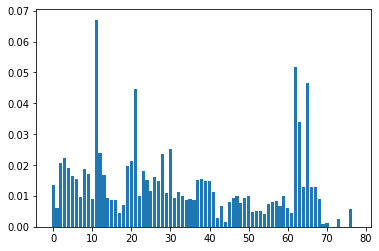

In [1393]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

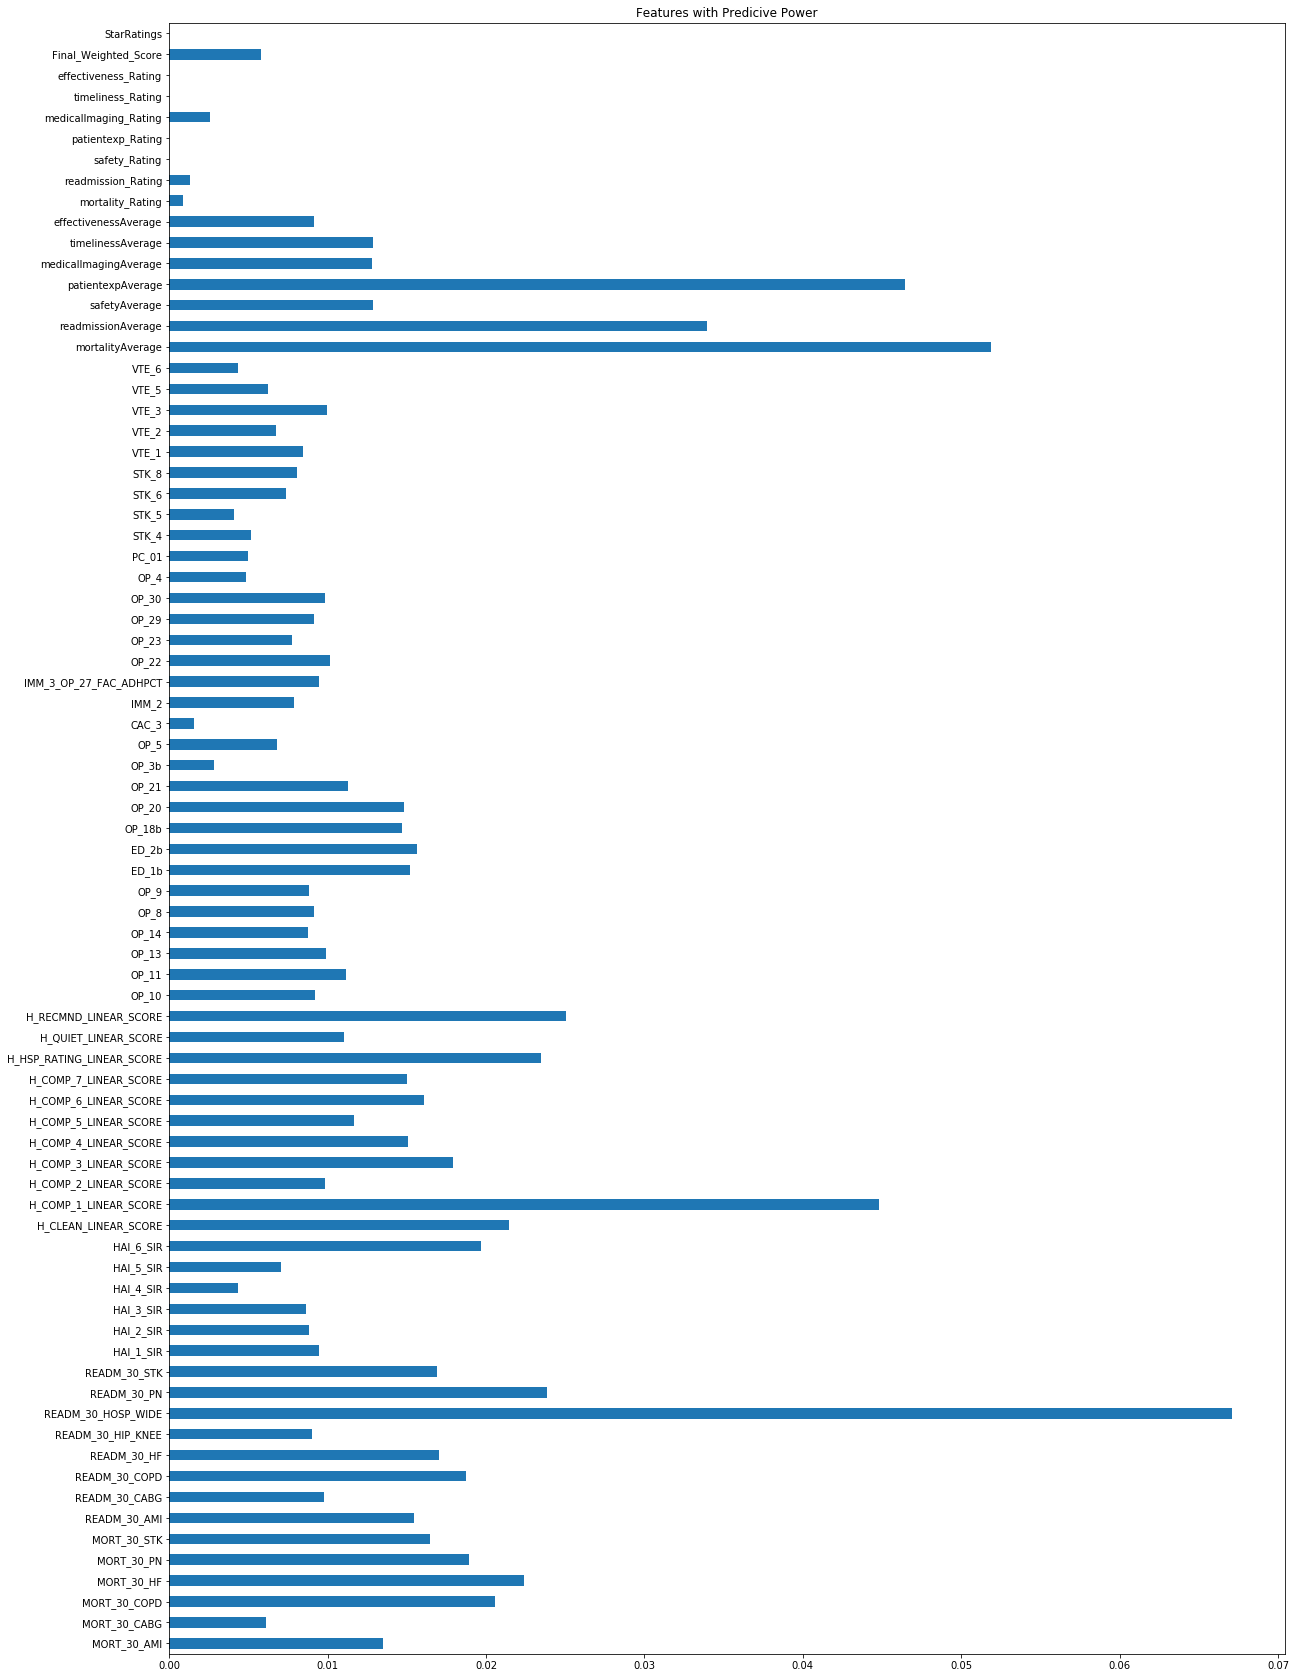

In [1394]:
plt.figure(figsize=(20,30))
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.plot(kind='barh')
plt.title("Features with Predicive Power")
plt.show()

## PCA

In [1395]:
#Applying PCA for factor analysis
#Importing the PCA Module

df_pca = df_main[num_columns]
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=62)
pca.fit(df_pca)
pca.components_

array([[-0.05628216,  0.01031837,  0.00061737, ..., -0.05968848,
        -0.04102528,  0.05871729],
       [-0.03057   , -0.1825401 , -0.11120106, ...,  0.06432066,
        -0.05603264,  0.06584362],
       [-0.0241973 ,  0.02248032,  0.00316234, ..., -0.14872603,
        -0.15468579,  0.14821523],
       ...,
       [-0.0331679 , -0.00517443, -0.00319567, ...,  0.00531016,
         0.00429971,  0.0030329 ],
       [ 0.00230889,  0.00440677, -0.01095085, ...,  0.00899795,
         0.00658147,  0.00257745],
       [ 0.01556478, -0.00370927,  0.01226712, ...,  0.0088671 ,
        -0.01253553, -0.00625839]])

In [1396]:
# Variance ratio

pca.explained_variance_ratio_

array([0.15081527, 0.05124668, 0.04942442, 0.04575488, 0.03469237,
       0.02546493, 0.02219316, 0.02170637, 0.02070151, 0.01951022,
       0.01946161, 0.01836686, 0.01798813, 0.01755931, 0.01741002,
       0.01628566, 0.01621647, 0.01590588, 0.01573195, 0.01536167,
       0.01517392, 0.01489397, 0.01450021, 0.01436327, 0.01418631,
       0.01379235, 0.01357108, 0.01317162, 0.01294546, 0.01284855,
       0.01243066, 0.01197271, 0.01182359, 0.0117695 , 0.01137297,
       0.01123036, 0.01085852, 0.01054184, 0.01035446, 0.01028678,
       0.00974758, 0.0095502 , 0.00916426, 0.00914092, 0.00877419,
       0.00854813, 0.00848189, 0.00794942, 0.00758464, 0.00744283,
       0.00658093, 0.00599482, 0.00587243, 0.00482428, 0.004788  ,
       0.00457341, 0.00438182, 0.00367428, 0.00291711, 0.0027274 ,
       0.00152475, 0.0011795 , 0.00069173])

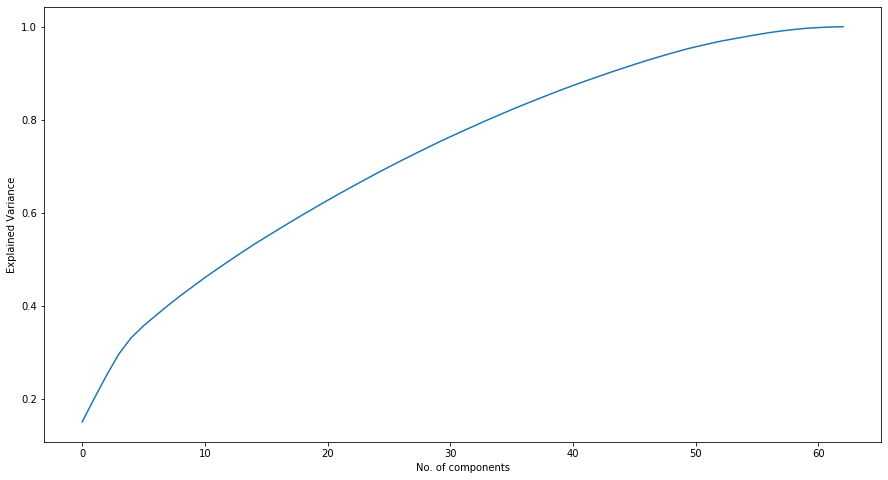

In [1397]:
## Screeplot - plotting cumulative variance against number of components
%matplotlib inline
fig=plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Explained Variance')
plt.show()

In [1398]:
#Clustering

## calculate the hopkins statistic if the data is suitable for clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    a = X.shape[1]
    b=len(X)
    c=int(0.1*b)
    nbrs=NearestNeighbors(n_neighbors=1).fit(X.values)
    random_X=sample(range(0,b,1),c)
    
    d1=[]
    d2=[]
    for j in range(0,c):
        dist1,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),a).reshape(1,-1),2,return_distance=True)
        d1.append(dist1[0][1])
        dist2,_=nbrs.kneighbors(X.iloc[random_X[j]].values.reshape(1,-1),2,return_distance=True)
        d2.append(dist2[0][1])
        
    hopkinsstat = sum(d1)/(sum(d1)+sum(d2))
    if isnan(hopkinsstat):
        print(d1,d2)
        hopkinsstat=0
        
    return hopkinsstat

In [1399]:
#Hopkins statistic measure
hopkins(df_pca)

0.8693284174901931

In [1400]:
cluster_df1 = pd.DataFrame({'Feature':df_pca.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                           'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],
                           'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],
                           'PC10':pca.components_[9],'PC11':pca.components_[10],'PC12':pca.components_[11],
                           'PC13':pca.components_[12],'PC14':pca.components_[13],'PC15':pca.components_[14],
                           'PC16':pca.components_[15],'PC17':pca.components_[16],'PC18':pca.components_[17],
                           'PC19':pca.components_[18],'PC20':pca.components_[19],'PC21':pca.components_[20],
                           'PC22':pca.components_[21],'PC23':pca.components_[22],'PC24':pca.components_[23],
                           'PC25':pca.components_[24],'PC26':pca.components_[25],'PC27':pca.components_[26],
                           'PC28':pca.components_[27],'PC29':pca.components_[28],'PC30':pca.components_[29],
                           'PC31':pca.components_[30],'PC32':pca.components_[31],'PC33':pca.components_[32],
                           'PC34':pca.components_[33],'PC35':pca.components_[34],'PC36':pca.components_[35],
                           'PC37':pca.components_[36],'PC38':pca.components_[37],'PC39':pca.components_[38],
                           'PC40':pca.components_[39],'PC41':pca.components_[40],'PC42':pca.components_[41],
                           'PC43':pca.components_[42],'PC44':pca.components_[43],'PC45':pca.components_[44],
                           'PC46':pca.components_[45],'PC47':pca.components_[46],'PC48':pca.components_[47],
                           'PC49':pca.components_[48],'PC50':pca.components_[49],'PC51':pca.components_[50],
                           'PC52':pca.components_[51],'PC53':pca.components_[52],'PC54':pca.components_[53],
                           'PC55':pca.components_[54],'PC56':pca.components_[55]})
cluster_df1

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56
0,Provider ID,-0.056282,-0.030570,-0.024197,-0.027813,0.011889,0.063561,0.068666,-0.075935,-0.234559,...,-0.051463,-0.038197,0.025252,0.029420,-0.023561,-0.049769,-0.059363,-0.076969,-0.020241,0.029548
1,MORT_30_AMI,0.010318,-0.182540,0.022480,-0.014536,0.343206,0.068037,-0.034534,0.071836,-0.051231,...,0.163601,0.049830,0.012330,-0.133229,-0.053383,-0.020172,-0.038183,-0.036567,0.015681,0.002532
2,MORT_30_CABG,0.000617,-0.111201,0.003162,0.020366,0.228314,0.081130,-0.112097,0.319744,-0.150254,...,-0.211850,-0.030719,0.035029,0.049772,-0.061111,0.039024,0.003381,0.024133,-0.006920,-0.005579
3,MORT_30_COPD,-0.022058,-0.149868,0.101352,-0.144712,0.336935,0.105791,0.027227,-0.154493,0.132525,...,-0.002805,-0.025806,0.054742,-0.156152,-0.002393,0.076880,-0.017549,-0.014179,0.010942,0.035837
4,MORT_30_HF,-0.071351,-0.236664,0.111327,-0.088941,0.314450,0.113369,0.020356,-0.141336,0.076972,...,0.174051,0.241703,0.413855,0.226167,0.033750,0.017550,0.029360,0.052944,0.009266,-0.047997
5,MORT_30_PN,-0.009709,-0.211514,0.049698,-0.026680,0.393133,0.064339,0.031809,-0.163853,0.080510,...,-0.153137,-0.206333,-0.400267,-0.044004,-0.099086,-0.189412,-0.039733,-0.024439,0.029047,0.012074
6,MORT_30_STK,-0.021426,-0.153642,0.092553,-0.124818,0.293346,0.113195,0.070048,0.012775,0.109045,...,-0.141876,-0.076083,-0.132261,0.134012,0.088646,0.037089,-0.012477,-0.015975,-0.077547,0.047366
7,READM_30_AMI,0.084019,0.025926,-0.182220,0.249756,0.122635,0.044285,0.024872,0.103512,-0.123295,...,-0.294871,0.080699,0.089597,0.156682,-0.057595,-0.013879,-0.002958,0.014359,-0.018215,-0.005263
8,READM_30_CABG,0.036236,-0.040338,-0.073735,0.127859,0.141461,0.116972,-0.062930,0.288041,-0.196980,...,0.272371,-0.048021,-0.027141,-0.005353,0.083894,0.041304,0.034878,-0.003224,-0.044210,-0.019239
9,READM_30_COPD,0.083157,0.024956,-0.173291,0.249532,0.126555,0.144131,0.100531,-0.150271,0.074151,...,0.273482,0.109891,-0.185596,0.228856,0.064439,-0.034121,0.092578,-0.017535,-0.121962,-0.090723


In [1401]:
cluster_df1.shape

(63, 57)

In [1402]:
## Incremental PCA and Our data with principal components
from sklearn.decomposition import IncrementalPCA
final_pca=IncrementalPCA(n_components=52)
df_increment_pca=final_pca.fit_transform(df_pca)
df_increment_pca.shape

(2903, 52)

In [1403]:
transpose_df=np.transpose(df_increment_pca)
transpose_df

array([[-1.46936163,  1.18881724, -0.24629735, ...,  1.80743807,
         3.22321681, -0.8064844 ],
       [ 1.88770884, -2.37935952, -3.7847722 , ...,  1.06253334,
         0.98252185, -2.35258592],
       [-1.48313048, -0.42265983, -0.61300675, ...,  0.96243314,
        -0.02806186, -0.76864524],
       ...,
       [ 0.56141306, -0.49659434,  0.25375076, ...,  0.72505363,
         1.00109677,  0.64422212],
       [ 0.40365188,  0.18296702,  0.96768188, ...,  0.04074007,
        -0.542462  , -0.62424554],
       [ 0.80779841, -0.12526981, -0.86373807, ..., -0.11383358,
        -0.15623129,  0.97804234]])

In [1404]:
## New Matrix

#rownames = cat.columns
df2_new_pca = pd.DataFrame({'PC1':transpose_df[0],'PC2':transpose_df[1],'PC3':transpose_df[2],
                           'PC4':transpose_df[3],'PC5':transpose_df[4],'PC6':transpose_df[5],
                           'PC7':transpose_df[6],'PC8':transpose_df[7],'PC9':transpose_df[8],
                           'PC10':transpose_df[9],'PC11':transpose_df[10],'PC12':transpose_df[11],
                           'PC13':transpose_df[12],'PC14':transpose_df[13],'PC15':transpose_df[14],
                           'PC16':transpose_df[15],'PC17':transpose_df[16],'PC18':transpose_df[17],
                           'PC19':transpose_df[18],'PC20':transpose_df[19],'PC21':transpose_df[20],
                           'PC22':transpose_df[21],'PC23':transpose_df[22],'PC24':transpose_df[23],
                           'PC25':transpose_df[24],'PC26':transpose_df[25],'PC27':transpose_df[26],
                           'PC28':transpose_df[27],'PC29':transpose_df[28],'PC30':transpose_df[29],
                           'PC31':transpose_df[30],'PC32':transpose_df[31],'PC33':transpose_df[32],
                           'PC34':transpose_df[33],'PC35':transpose_df[34],'PC36':transpose_df[35],
                           'PC37':transpose_df[36],'PC38':transpose_df[37],'PC39':transpose_df[38],
                           'PC40':transpose_df[39],'PC41':transpose_df[40],'PC42':transpose_df[41],
                           'PC43':transpose_df[42],'PC44':transpose_df[43],'PC45':transpose_df[44],
                           'PC46':transpose_df[45],'PC47':transpose_df[46],'PC48':transpose_df[47],
                           'PC49':transpose_df[48],'PC50':transpose_df[49],'PC51':transpose_df[50],
                           'PC52':transpose_df[51]})
df2_new_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
0,-1.469362,1.887709,-1.483130,0.292775,2.113930,-0.150617,-0.782912,2.873059,-0.776019,-0.276759,...,-0.805575,0.495688,-0.469565,0.186882,-0.033261,-0.989736,0.593085,0.561413,0.403652,0.807798
1,1.188817,-2.379360,-0.422660,0.296944,2.170429,1.682096,0.408064,1.335895,0.648024,0.105416,...,-0.096465,0.143966,0.490802,-0.007616,0.063755,-1.494200,0.268279,-0.496594,0.182967,-0.125270
2,-0.246297,-3.784772,-0.613007,-0.174918,2.244364,-0.285791,-0.918296,1.265448,-0.055917,0.359223,...,-1.650114,1.243183,0.290144,-0.422047,-1.438874,-0.878107,0.621176,0.253751,0.967682,-0.863738
3,1.086947,-2.755914,-1.591990,3.071320,1.203470,2.104820,-2.676720,-3.261014,2.600521,1.545754,...,-0.457340,-1.305175,-0.656213,1.214002,0.052368,-0.041261,0.795828,1.442652,0.916840,0.104039
4,-3.160078,-1.637636,-9.379939,4.280631,-1.633757,-5.093301,-3.414931,2.082084,-5.909875,0.430801,...,-0.943642,1.150248,0.224334,-2.778810,0.060451,-0.288000,-0.166969,-0.376540,-0.841501,-0.179124


In [1405]:
df2_new_pca.shape

(2903, 52)

In [1406]:
#Hopkins statistic measure
hopkins(df2_new_pca)

0.8218253060972789

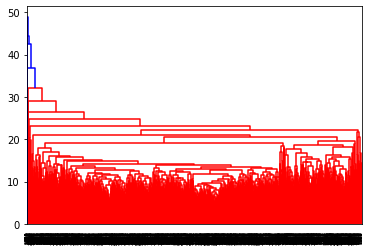

In [1407]:
## Heirarchical clustering using single linkage procedure
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

data_df3 = df2_new_pca
data_df3_df1=scaler.fit_transform(data_df3)
mergings = linkage(data_df3_df1,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [1408]:
## Cluster cutting for better shapes

Clustercut = pd.Series(cut_tree(mergings,n_clusters=10).reshape(-1,))
data_df3_hc=pd.concat([data_df3,Clustercut],axis=1)
data_df3_hc.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                     'PC51','PC52','Clusters']
data_df3_hc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,Clusters
0,-1.469362,1.887709,-1.483130,0.292775,2.113930,-0.150617,-0.782912,2.873059,-0.776019,-0.276759,...,0.495688,-0.469565,0.186882,-0.033261,-0.989736,0.593085,0.561413,0.403652,0.807798,0
1,1.188817,-2.379360,-0.422660,0.296944,2.170429,1.682096,0.408064,1.335895,0.648024,0.105416,...,0.143966,0.490802,-0.007616,0.063755,-1.494200,0.268279,-0.496594,0.182967,-0.125270,0
2,-0.246297,-3.784772,-0.613007,-0.174918,2.244364,-0.285791,-0.918296,1.265448,-0.055917,0.359223,...,1.243183,0.290144,-0.422047,-1.438874,-0.878107,0.621176,0.253751,0.967682,-0.863738,0
3,1.086947,-2.755914,-1.591990,3.071320,1.203470,2.104820,-2.676720,-3.261014,2.600521,1.545754,...,-1.305175,-0.656213,1.214002,0.052368,-0.041261,0.795828,1.442652,0.916840,0.104039,0
4,-3.160078,-1.637636,-9.379939,4.280631,-1.633757,-5.093301,-3.414931,2.082084,-5.909875,0.430801,...,1.150248,0.224334,-2.778810,0.060451,-0.288000,-0.166969,-0.376540,-0.841501,-0.179124,1


In [1409]:
data_df3_hc['Clusters'].value_counts()

0    2861
1      25
6       5
3       4
4       3
9       1
7       1
5       1
8       1
2       1
Name: Clusters, dtype: int64

In [1410]:
data_df3_hc.shape

(2903, 53)

In [1411]:
cluster_finaldf=pd.DataFrame(data_df3_hc.groupby(["Clusters"]))
cluster_finaldf.head()

,0,1
0,0,PC1 PC2 PC3 PC4 ...
1,1,PC1 PC2 PC3 PC4 ...
2,2,PC1 PC2 PC3 PC4 ...
3,3,PC1 PC2 PC3 PC4 ...
4,4,PC1 PC2 PC3 PC4 ...


In [1412]:
# Adding clusters to main dataframe
df_pca_resultant = data_df3_hc['Clusters']
df_pca_result = pd.concat([cat,df_pca_resultant], axis=1, join='outer')
df_pca_result = pd.concat([num,df_pca_result], axis=1, join='outer')
df_pca_result.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,...,Address,City,State,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Clusters
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,16.50,15.1,21.1,...,1108 ROSS CLARK CIRCLE,DOTHAN,AL,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,0
1,10005,16.0,3.2,7.6,15.5,20.8,15.5,16.70,14.3,18.0,...,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,0
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,16.10,15.2,19.8,...,205 MARENGO STREET,FLORENCE,AL,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,0
3,10007,14.0,3.2,9.3,14.4,18.8,16.6,16.85,14.3,19.9,...,702 N MAIN ST,OPP,AL,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,0
4,10011,13.9,3.7,7.4,13.8,17.9,12.6,17.70,15.0,19.6,...,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,JEFFERSON,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,1
